# 1. Sắp xếp dữ liệu DH1 theo thứ tự tăng dần: #


In [3]:
import pandas as pd

# Đọc dữ liệu từ file CSV
file_path = r"C:\Users\Admin\Documents\207CT28171\processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path)

# In ra toàn bộ dữ liệu
print(df)

# Kiểm tra các cột có trong dữ liệu
df_columns = df.columns
print("Các cột trong dataset:", df_columns)

# Kiểm tra nếu cột 'DH1' tồn tại trong dữ liệu
if 'DH1' in df_columns:
    # Sắp xếp theo cột DH1 tăng dần
    df_sorted = df.sort_values(by='DH1', ascending=True)
    
    # Hiển thị 10 dòng đầu tiên sau khi sắp xếp
    print(df_sorted)
else:
    print("Cột 'DH1' không tồn tại trong dataset. Vui lòng kiểm tra lại file dữ liệu.")


    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
0     1  7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  ...  7.00  7.54  7.01   
1     2  5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  ...  4.69  5.47  5.07   
2     3  5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  ...  5.77  5.38  6.04   
3     4  6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  ...  6.21  5.20  6.88   
4     5  6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  ...  6.50  6.36  6.99   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
95   96  8.6  6.9  7.4  8.8  7.6  5.8  7.3  5.7  8.9  ...  7.43  7.42  6.83   
96   97  3.7  5.4  6.0  5.1  5.5  3.9  6.1  4.4  4.1  ...  4.93  5.15  6.39   
97   98  8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  ...  7.05  7.84  7.67   
98   99  2.7  1.8  3.4  5.3  4.5  7.9  4.9  3.8  2.8  ...  4.15  4.72  5.29   
99  100  4.1  5.2  4.9  5.3  5.5  5.4  7.2  5.4  4.4  ...  5.26  5.72  5.85   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT 

## 2. Sắp xếp cột DH2 tăng dần theo nhóm giới tính #

In [4]:
# Sắp xếp theo cột DH2 tăng dần theo nhóm giới tính
if 'DH2' in df.columns and 'GioiTinh' in df.columns:
    df_sorted = df.sort_values(by=['GioiTinh', 'DH2'], ascending=[True, True])
    print(df_sorted)
else:
    print("Một trong các cột 'DH2' hoặc 'GioiTinh' không tồn tại trong dataset. Vui lòng kiểm tra lại dữ liệu.")


Một trong các cột 'DH2' hoặc 'GioiTinh' không tồn tại trong dataset. Vui lòng kiểm tra lại dữ liệu.


## 3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT ##


In [5]:

if 'DH1' in df.columns and 'KT' in df.columns:
    pivot_table = df.pivot_table(
        values='DH1', 
        index='KT', 
        aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std',
                 lambda x: x.quantile(0.25),  # Q1
                 lambda x: x.quantile(0.50),  # Q2
                 lambda x: x.quantile(0.75)]  # Q3
    )
    
    pivot_table.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']
    print(pivot_table)
else:
    print("Một trong các cột 'DH1' hoặc 'KT' không tồn tại trong dataset. Vui lòng kiểm tra lại dữ liệu.")

    count     sum      mean  median   min   max       std      Q1    Q2     Q3
KT                                                                            
A      49  163.50  3.336735    3.25  1.00  6.50  1.274296  2.2500  3.25  4.250
A1      6   17.50  2.916667    3.00  2.00  4.25  0.861201  2.1875  3.00  3.250
B       9   29.50  3.277778    3.50  1.75  4.50  0.823905  3.2500  3.50  3.750
C      14   79.25  5.660714    5.25  4.75  7.00  0.812209  5.0625  5.25  6.375
D1     22   84.25  3.829545    3.75  1.25  6.75  1.370146  3.0000  3.75  4.875


## 4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 THEO KT và KV


In [6]:
# Tạo pivot-table để thống kê DH1 theo KT và KV
if 'DH1' in df.columns and 'KT' in df.columns and 'KV' in df.columns:
    pivot_table = df.pivot_table(
        values='DH1', 
        index=['KT', 'KV'], 
        aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std',
                 lambda x: x.quantile(0.25),  # Q1
                 lambda x: x.quantile(0.50),  # Q2
                 lambda x: x.quantile(0.75)]  # Q3
    )
    
    pivot_table.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']
    print(pivot_table)
else:
    print("Một trong các cột 'DH1', 'KT' hoặc 'KV' không tồn tại trong dataset. Vui lòng kiểm tra lại dữ liệu.")

        count    sum      mean  median   min   max       std      Q1     Q2  \
KT KV                                                                         
A  1       29  93.75  3.232759   3.250  1.00  6.50  1.369194  2.0000  3.250   
   2        9  31.75  3.527778   3.500  2.00  6.25  1.427653  2.2500  3.500   
   2NT     11  38.00  3.454545   3.500  2.00  4.75  0.913908  2.8750  3.500   
A1 1        2   4.75  2.375000   2.375  2.00  2.75  0.530330  2.1875  2.375   
   2NT      4  12.75  3.187500   3.250  2.00  4.25  0.921389  2.9375  3.250   
B  1        8  25.75  3.218750   3.375  1.75  4.50  0.860207  3.0000  3.375   
   2NT      1   3.75  3.750000   3.750  3.75  3.75       NaN  3.7500  3.750   
C  1        8  43.50  5.437500   5.250  4.75  7.00  0.728869  5.0000  5.250   
   2        2  11.50  5.750000   5.750  5.00  6.50  1.060660  5.3750  5.750   
   2NT      4  24.25  6.062500   6.000  5.25  7.00  0.943729  5.2500  6.000   
D1 1       13  46.75  3.596154   3.500  1.50  5.75  

## 5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT ##


In [7]:
# Tạo pivot-table để thống kê DH1 theo KT, KV và DT
if 'DH1' in df.columns and 'KT' in df.columns and 'KV' in df.columns and 'DT' in df.columns:
    pivot_table = df.pivot_table(
        values='DH1', 
        index=['KT', 'KV', 'DT'], 
        aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std',
                 lambda x: x.quantile(0.25),  # Q1
                 lambda x: x.quantile(0.50),  # Q2
                 lambda x: x.quantile(0.75)]  # Q3
    )
    
    pivot_table.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']
    print(pivot_table)
else:
    print("Một trong các cột 'DH1', 'KT', 'KV' hoặc 'DT' không tồn tại trong dataset. Vui lòng kiểm tra lại dữ liệu.")


            count    sum      mean  median   min   max       std      Q1  \
KT KV  DT                                                                  
A  1   0.0     29  93.75  3.232759   3.250  1.00  6.50  1.369194  2.0000   
   2   0.0      8  27.50  3.437500   3.000  2.00  6.25  1.498511  2.2500   
       6.0      1   4.25  4.250000   4.250  4.25  4.25       NaN  4.2500   
   2NT 0.0     11  38.00  3.454545   3.500  2.00  4.75  0.913908  2.8750   
A1 1   0.0      2   4.75  2.375000   2.375  2.00  2.75  0.530330  2.1875   
   2NT 0.0      4  12.75  3.187500   3.250  2.00  4.25  0.921389  2.9375   
B  1   0.0      8  25.75  3.218750   3.375  1.75  4.50  0.860207  3.0000   
   2NT 0.0      1   3.75  3.750000   3.750  3.75  3.75       NaN  3.7500   
C  1   0.0      8  43.50  5.437500   5.250  4.75  7.00  0.728869  5.0000   
   2   0.0      2  11.50  5.750000   5.750  5.00  6.50  1.060660  5.3750   
   2NT 0.0      4  24.25  6.062500   6.000  5.25  7.00  0.943729  5.2500   
D1 1   0.0  

## Phần 2

## 1.  Hãy trình bày dữ liệu biến: GT #

    Tần số  Tần suất
GT                  
M       52      0.52
F       48      0.48


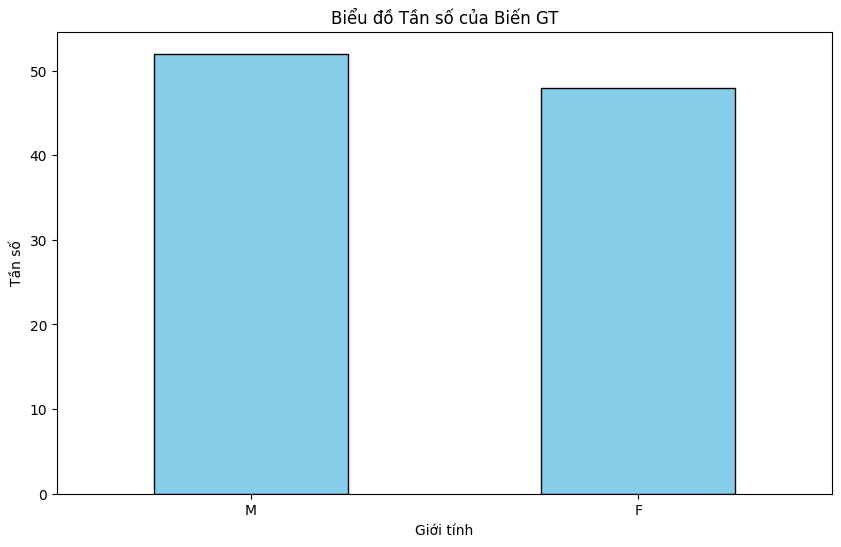

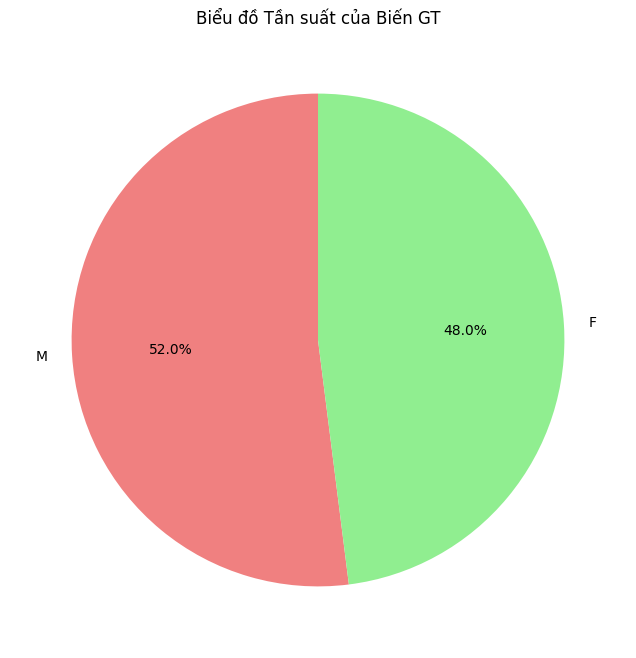

In [8]:
import matplotlib.pyplot as plt

# Giả sử dữ liệu đã được load vào DataFrame df
# Tạo bảng tần số và tần suất
frequency_table = df['GT'].value_counts()
relative_frequency = df['GT'].value_counts(normalize=True)

# Lập bảng tần số và tần suất
freq_df = pd.DataFrame({
    'Tần số': frequency_table,
    'Tần suất': relative_frequency
})

# In bảng tần số và tần suất
print(freq_df)

# Vẽ biểu đồ tần số (cột)
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Biểu đồ Tần số của Biến GT')
plt.xlabel('Giới tính')
plt.ylabel('Tần số')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tần suất (tròn)
plt.figure(figsize=(8, 8))
relative_frequency.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Biểu đồ Tần suất của Biến GT')
plt.ylabel('')  # Không cần nhãn cho trục y
plt.show()

## 2. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3 ##

Bảng tần số và tần suất của US_TBM1:
         Tần số  Tần suất
US_TBM1                  
2.724         3      0.03
2.048         3      0.03
2.972         2      0.02
2.720         2      0.02
2.276         2      0.02
...         ...       ...
2.440         1      0.01
1.972         1      0.01
2.820         1      0.01
1.660         1      0.01
2.104         1      0.01

[89 rows x 2 columns]

--------------------------------------------------



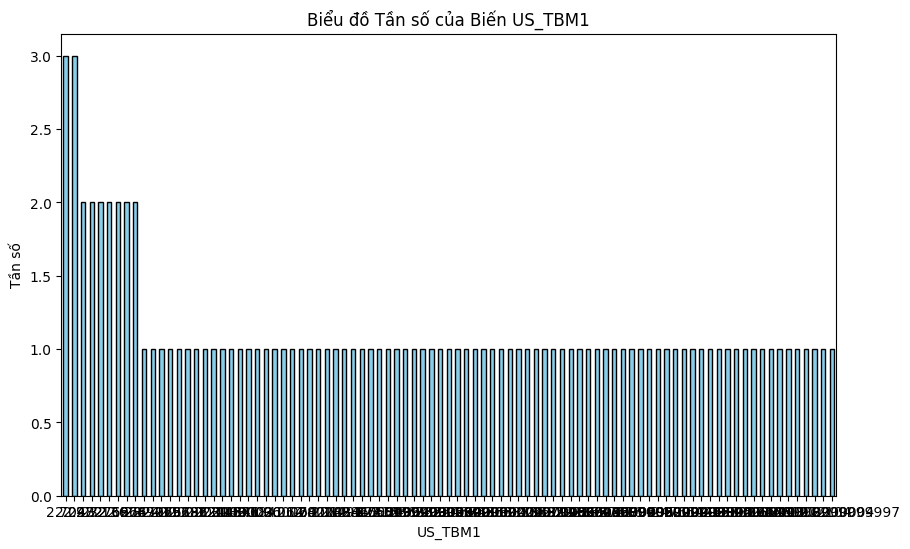

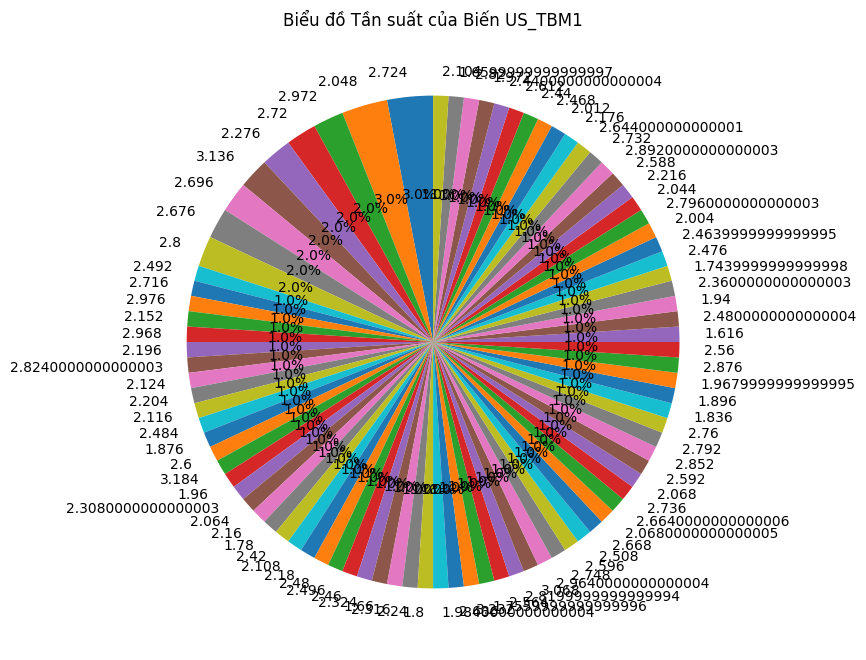

Bảng tần số và tần suất của US_TBM2:
         Tần số  Tần suất
US_TBM2                  
2.188         2      0.02
2.900         2      0.02
2.080         2      0.02
3.028         2      0.02
2.476         2      0.02
...         ...       ...
2.968         1      0.01
2.060         1      0.01
3.136         1      0.01
1.888         1      0.01
2.288         1      0.01

[91 rows x 2 columns]

--------------------------------------------------



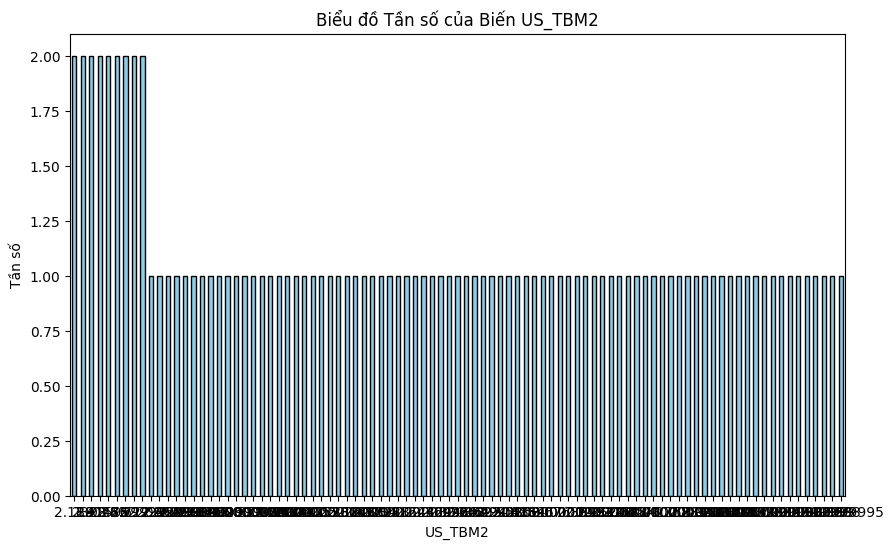

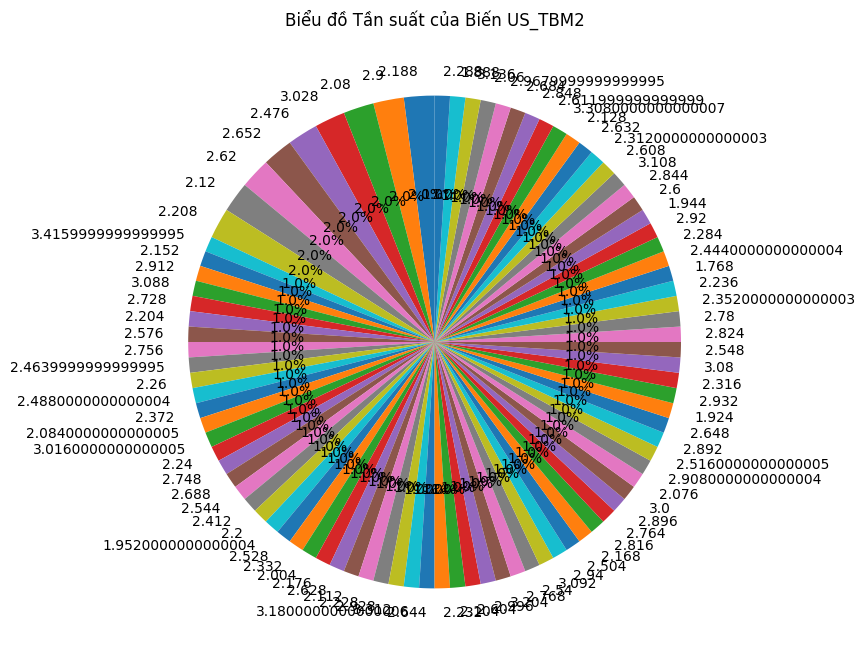

Bảng tần số và tần suất của US_TBM3:
         Tần số  Tần suất
US_TBM3                  
2.804         2      0.02
2.812         2      0.02
2.752         2      0.02
2.688         2      0.02
2.756         2      0.02
...         ...       ...
2.732         1      0.01
2.556         1      0.01
3.068         1      0.01
2.116         1      0.01
2.340         1      0.01

[91 rows x 2 columns]

--------------------------------------------------



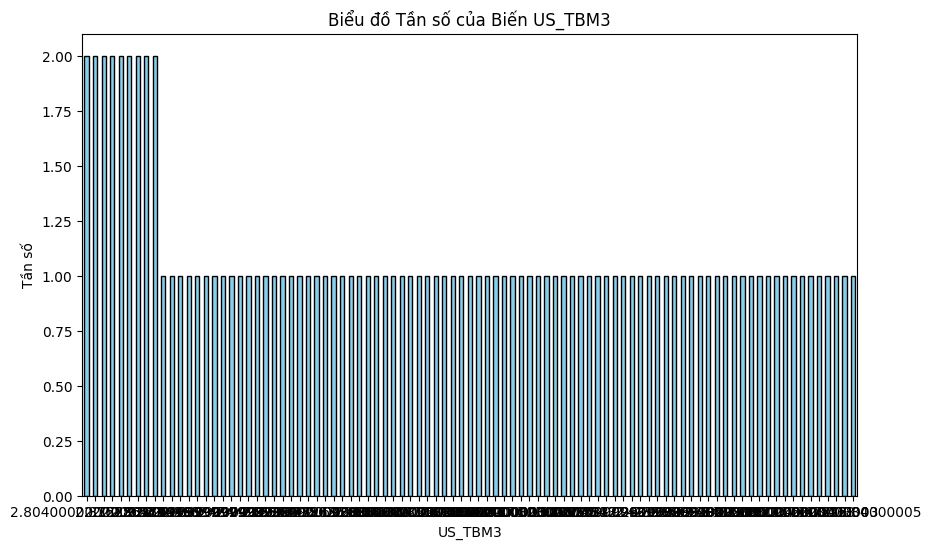

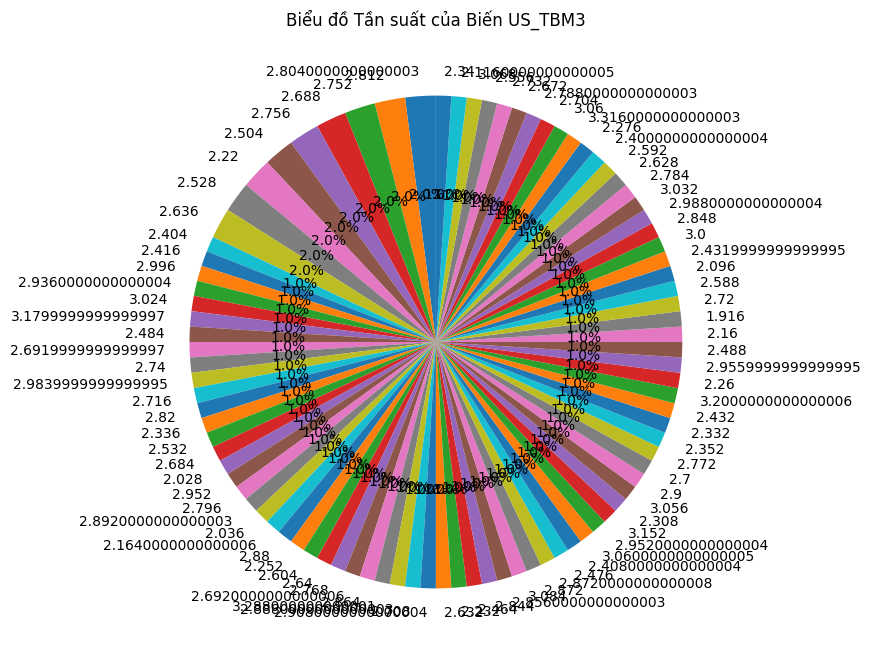

In [9]:
import matplotlib.pyplot as plt

# Giả sử dữ liệu đã được load vào DataFrame df

# Hàm trình bày tần số và tần suất cho mỗi biến
def display_frequency_and_plot(variable_name):
    # Tạo bảng tần số và tần suất
    frequency_table = df[variable_name].value_counts()
    relative_frequency = df[variable_name].value_counts(normalize=True)

    # Lập bảng tần số và tần suất
    freq_df = pd.DataFrame({
        'Tần số': frequency_table,
        'Tần suất': relative_frequency
    })
    
    # In bảng tần số và tần suất
    print(f"Bảng tần số và tần suất của {variable_name}:")
    print(freq_df)
    print("\n" + "-"*50 + "\n")

    # Vẽ biểu đồ tần số (cột)
    plt.figure(figsize=(10, 6))
    frequency_table.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Biểu đồ Tần số của Biến {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Tần số')
    plt.xticks(rotation=0)
    plt.show()

    # Vẽ biểu đồ tần suất (tròn)
    plt.figure(figsize=(8, 8))
    relative_frequency.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Biểu đồ Tần suất của Biến {variable_name}')
    plt.ylabel('')  # Không cần nhãn cho trục y
    plt.show()

# Trình bày dữ liệu cho US_TBM1, US_TBM2, và US_TBM3
display_frequency_and_plot('US_TBM1')
display_frequency_and_plot('US_TBM2')
display_frequency_and_plot('US_TBM3')

## 3. Hãy trình bày dữ liệu biến DT với các học sinh là nam 

Bảng tần số và tần suất của biến DT với học sinh là nam:
Empty DataFrame
Columns: [Tần số, Tần suất]
Index: []

--------------------------------------------------

Không có dữ liệu để vẽ biểu đồ cột tần số.


<Figure size 1000x600 with 0 Axes>

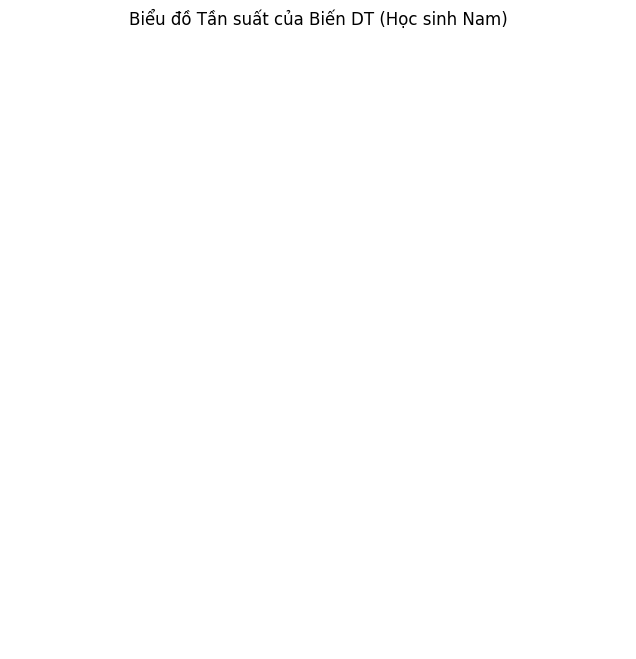

In [13]:

import matplotlib.pyplot as plt

# Giả sử dữ liệu đã được load vào DataFrame df

# Lọc dữ liệu để chỉ lấy các học sinh là nam
df_men = df[df['GT'] == 'Nam']

# Tạo bảng tần số và tần suất cho biến DT đối với học sinh nam
frequency_table = df_men['DT'].value_counts()
relative_frequency = df_men['DT'].value_counts(normalize=True)

# Lập bảng tần số và tần suất
freq_df = pd.DataFrame({
    'Tần số': frequency_table,
    'Tần suất': relative_frequency
})

# In bảng tần số và tần suất
print("Bảng tần số và tần suất của biến DT với học sinh là nam:")
print(freq_df)
print("\n" + "-"*50 + "\n")

# Vẽ biểu đồ tần số (cột)
plt.figure(figsize=(10, 6))

# Kiểm tra xem frequency_table có rỗng hay không trước khi vẽ
if not frequency_table.empty:  # Hoặc len(frequency_table) > 0 nếu frequency_table là Series
    frequency_table.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Biểu đồ Tần số của Biến DT (Học sinh Nam)')
    plt.xlabel('DT')
    plt.ylabel('Tần số')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Không có dữ liệu để vẽ biểu đồ cột tần số.")

# Vẽ biểu đồ tần suất (tròn)
plt.figure(figsize=(8, 8))
relative_frequency.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Tần suất của Biến DT (Học sinh Nam)')
plt.ylabel('')
plt.show()



## 1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
## Gợi ý - - - - 
## Lọc dữ liệu giới tính là nữ 
## Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại 
## Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS] 
## Ox: thể hiện nhóm XL1, XL2 và XL3 

In [16]:

import matplotlib.pyplot as plt

# Giả sử dữ liệu đã được load vào DataFrame df

# Lọc dữ liệu: chỉ lấy học sinh nữ
df_female = df[df['GT'] == 'Nữ']

# Kiểm tra xem cột 'XL' có tồn tại hay không
if 'XL' in df_female.columns:
    # Tính số lượng học sinh theo xếp loại cho từng nhóm XL1, XL2, XL3
    grouped = df_female.groupby(['XL', 'Group']).size().unstack(fill_value=0)

    # Vẽ biểu đồ cột unstacked
    grouped.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='tab10')
    plt.show()
else:
    print("Cột 'XL' không tồn tại trong DataFrame df_female.")

Cột 'XL' không tồn tại trong DataFrame df_female.


## Phần 4: 1. Vẽ biểu đồ simple cho biến T1:

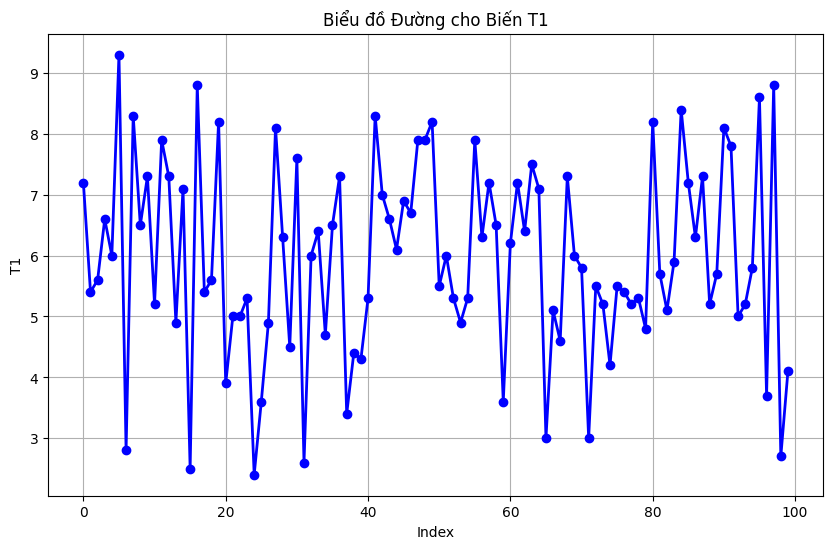

In [17]:

import matplotlib.pyplot as plt

# Giả sử dữ liệu đã được load vào DataFrame df

# Vẽ biểu đồ đường cho biến T1
plt.figure(figsize=(10, 6))
plt.plot(df['T1'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ Đường cho Biến T1')
plt.xlabel('Index')
plt.ylabel('T1')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


## 2. Hãy tạo biến phân loại cho T1:

In [21]:




# Tạo biến phân loại phanlopt1 cho môn T1 theo các điều kiện đã cho
def classify_t1(x):
    if 0 <= x < 5:
        return 'k'  # kém
    elif 5 <= x < 7:
        return 'tb'  # trung bình
    elif 7 <= x < 8:
        return 'k'  # khá
    elif x >= 8:
        return 'g'  # giỏi
    else:
        return 'Không xác định'

# Áp dụng hàm phân loại vào cột T1
df['phanlopt1'] = df['T1'].apply(classify_t1)

# In kết quả
print(df[['T1', 'phanlopt1']])


     T1 phanlopt1
0   7.2         k
1   5.4        tb
2   5.6        tb
3   6.6        tb
4   6.0        tb
..  ...       ...
95  8.6         g
96  3.7         k
97  8.8         g
98  2.7         k
99  4.1         k

[100 rows x 2 columns]


## 3.  Lập bảng tần số cho biến phanloait1 

In [22]:
# Lập bảng tần số cho biến phanlopt1
frequency_table = df['phanlopt1'].value_counts()

# In kết quả
print("Bảng tần số của biến phanlopt1:")
print(frequency_table)


Bảng tần số của biến phanlopt1:
phanlopt1
tb    46
k     42
g     12
Name: count, dtype: int64


## 4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1 

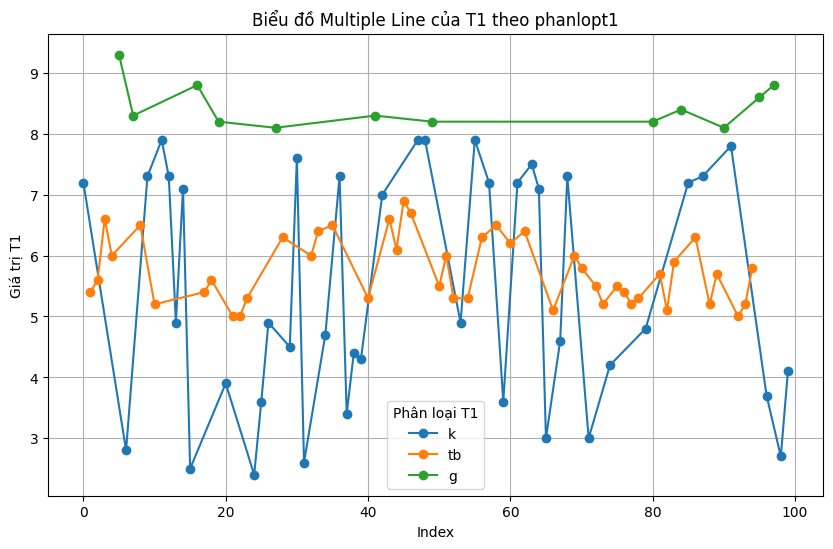

In [23]:

import matplotlib.pyplot as plt

# Giả sử dữ liệu đã được load vào DataFrame df

# Lọc dữ liệu theo các nhóm của biến phanlopt1
plt.figure(figsize=(10, 6))

for category in df['phanlopt1'].unique():
    subset = df[df['phanlopt1'] == category]
    plt.plot(subset.index, subset['T1'], marker='o', linestyle='-', label=category)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ Multiple Line của T1 theo phanlopt1')
plt.xlabel('Index')
plt.ylabel('Giá trị T1')
plt.legend(title='Phân loại T1')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


## 5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1

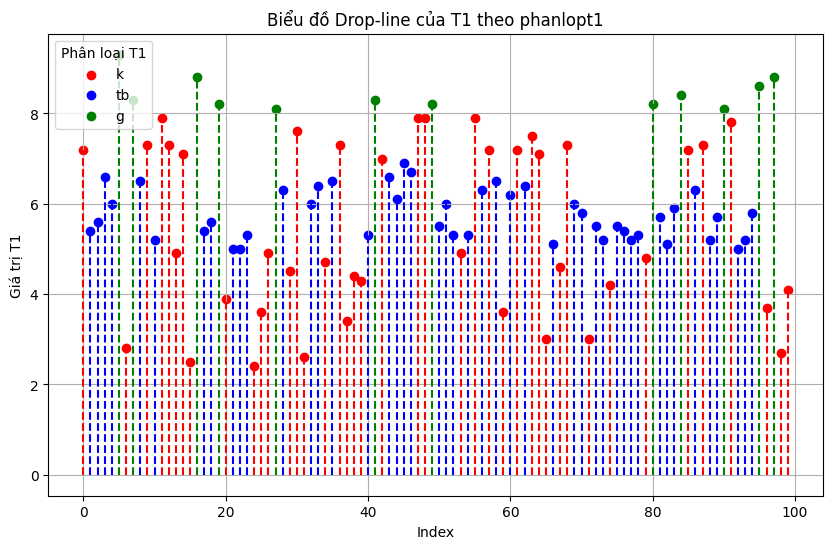

In [24]:

import matplotlib.pyplot as plt

# Tạo biểu đồ Drop-line
plt.figure(figsize=(10, 6))

# Màu sắc cho từng nhóm
colors = {'k': 'red', 'tb': 'blue', 'g': 'green'}

# Duyệt qua từng nhóm phân loại của phanlopt1
for category, color in colors.items():
    subset = df[df['phanlopt1'] == category]
    plt.scatter(subset.index, subset['T1'], color=color, label=category)
    for x, y in zip(subset.index, subset['T1']):
        plt.plot([x, x], [0, y], color=color, linestyle='dashed')

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ Drop-line của T1 theo phanlopt1')
plt.xlabel('Index')
plt.ylabel('Giá trị T1')
plt.legend(title='Phân loại T1')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()
